## Name :- Shital Ashok Gaikwad

### TechnoHacksEdutech Intern Task 1 :- House Price Prediction


### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import norm,kurtosis,skew

### Import Datasets i.e. Training & Testing
### Training dataset

In [2]:
train_data=pd.read_csv(r"D:\Datasets\house_price_train.csv")
train_data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


### Basic Information About data

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


### Basic statistical information about dataset.

In [4]:
train_data.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


# Total rows and columns in the training data.

In [5]:
train_data.shape

(29451, 12)

### Result:-

* Here 29451 rows & 12 columns present in the dataset.

## Data Preprocessing

### Null Value Handling

In [6]:
train_data.isnull().any()

POSTED_BY                False
UNDER_CONSTRUCTION       False
RERA                     False
BHK_NO.                  False
BHK_OR_RK                False
SQUARE_FT                False
READY_TO_MOVE            False
RESALE                   False
ADDRESS                  False
LONGITUDE                False
LATITUDE                 False
TARGET(PRICE_IN_LACS)    False
dtype: bool

In [7]:
train_data.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

### result:-
* There is null values present in dataset.


### Duplicate values

In [8]:
train_data.duplicated().any()

train_data.duplicated().sum()

401

### Result:-
* There are 401 duplicate values present in our dataset.


### Duplicate Data Handling

# Lets try to remove that duplicate data.

In [9]:
Train_data=train_data.drop_duplicates()

In [10]:
Train_data.shape

(29050, 12)

### Result:-
* 401 Duplicate values are removed from the dataset.


In [11]:
# Lets check the duplicate data is present or not in our dataset.
Train_data.duplicated().sum()


0

### Result:-
* There is no duplicate data present in our dataset.


### Lets find out how many city are present in dataset.

In [12]:
# Lets check how many unique values are present in the Address column.
Train_data["ADDRESS"].nunique()

6899

In [13]:
# Find unique city name from the adress column and store it in new variable.
Train_data["CITY"]=Train_data["ADDRESS"].str.split(",").str.get(1)

C:\Users\shita\AppData\Local\Temp\ipykernel_7596\341450388.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train_data["CITY"]=Train_data["ADDRESS"].str.split(",").str.get(1)


In [14]:
Train_data["CITY"].nunique()

433

## Result:-
* All unique city name are stored in City column.

### Unique City names from the dataset.

In [15]:
city=Train_data["CITY"].head(10).unique()
print("Top 10 city name which has max house for selling",city)

Top 10 city name which has max house for selling ['Bangalore' 'Mysore' 'Ghaziabad' 'Kolkata' 'Kochi' 'Jaipur' 'Mohali'
 'Chennai']


### Find out Top 10 city name and visualize it.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

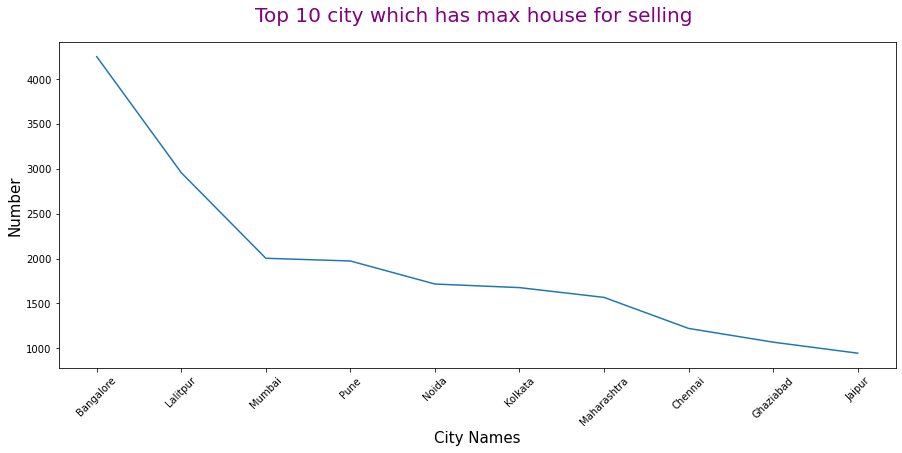

In [16]:
plt.figure(figsize=(15,6))
plt.plot(Train_data["CITY"].value_counts().head(10))
plt.title("Top 10 city which has max house for selling ",pad=20,fontsize=20,color="purple")
plt.xlabel("City Names",fontsize=15)
plt.ylabel("Number",fontsize=15)
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Pie chart')

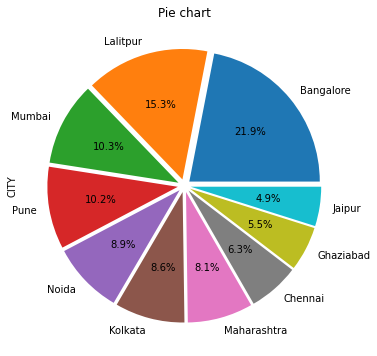

In [17]:
plt.figure(figsize=(15,6))
Train_data["CITY"].value_counts().head(10).plot(kind="pie",autopct="%1.1f%%",explode=[0.05]*10)
plt.title("Pie chart")

### Result:-
* Most of the houses are belongs to the Banglore site.

In [18]:
del Train_data["ADDRESS"]

### Data Labelling

In [19]:
# Convert string data into numerical form.
le=LabelEncoder()
col=["POSTED_BY","BHK_OR_RK","CITY"]
for i in col:
    Train_data[i]=le.fit_transform(Train_data[i])

Train_data

C:\Users\shita\AppData\Local\Temp\ipykernel_7596\2277289506.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train_data[i]=le.fit_transform(Train_data[i])


,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY
0,2,0,0,2,0,1300.236407,1,1,12.969910,77.597960,55.0,167
1,1,0,0,2,0,1275.000000,1,1,12.274538,76.644605,51.0,313
2,2,0,0,2,0,933.159722,1,1,12.778033,77.632191,43.0,167
3,2,0,1,2,0,929.921143,1,1,28.642300,77.344500,62.5,227
4,1,1,0,2,0,999.009247,0,1,22.592200,88.484911,60.5,285
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,2,0,0,3,0,2500.000000,1,1,27.140626,78.043277,45.0,145
29447,2,0,0,2,0,769.230769,1,1,39.945409,-86.150721,16.0,52
29448,1,0,0,2,0,1022.641509,1,1,26.928785,75.828002,27.1,255
29449,2,0,0,2,0,927.079009,1,1,12.900150,80.227910,67.0,200


D:\Shital\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Shital\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Shital\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Shital\Anaconda\lib\site-packages\sea

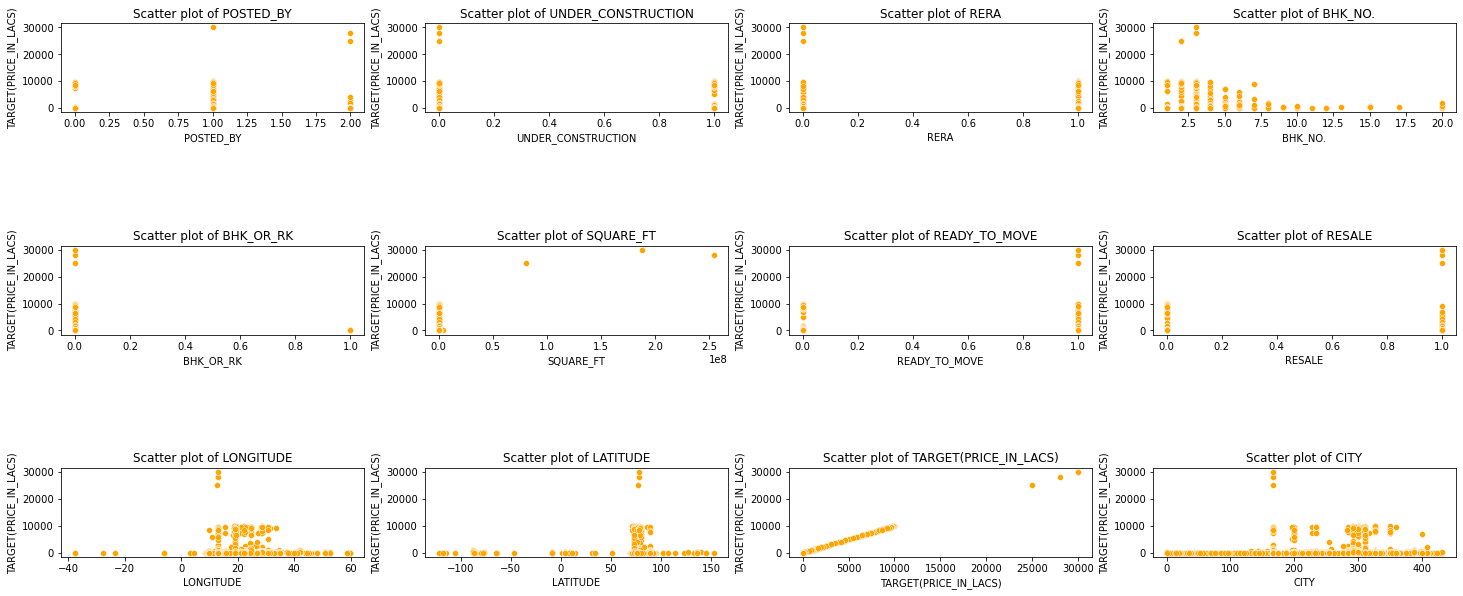

In [20]:
col=Train_data.columns
n=0
plt.figure(figsize=(25,18))
for i in col:
    n+=1
    if n<=17:
        plt.subplot(5,4,n)
        plt.subplots_adjust(hspace=1.5,wspace=0.2)
        sns.scatterplot(Train_data[i],Train_data["TARGET(PRICE_IN_LACS)"],color="orange")
        plt.title("Scatter plot of {}".format(i))
plt.show()

In [21]:
cor=Train_data.corr()
cor

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY
POSTED_BY,1.000000,-0.263952,-0.286281,-0.071285,-0.028160,0.005404,0.263952,0.333873,-0.047850,0.025527,-0.093575,-0.093034
UNDER_CONSTRUCTION,-0.263952,1.000000,0.364299,-0.042503,0.020956,-0.004233,-1.000000,-0.346085,0.006420,-0.000850,0.054618,0.072884
RERA,-0.286281,0.364299,1.000000,0.008403,0.006235,-0.006251,-0.364299,-0.270268,0.103617,-0.065424,0.067314,0.061128
BHK_NO.,-0.071285,-0.042503,0.008403,1.000000,-0.045412,0.005337,0.042503,0.013146,0.067711,0.046988,0.113654,-0.085519
BHK_OR_RK,-0.028160,0.020956,0.006235,-0.045412,1.000000,-0.000296,-0.020956,-0.029789,0.009311,0.000327,-0.004453,0.010048
SQUARE_FT,0.005404,-0.004233,-0.006251,0.005337,-0.000296,1.000000,0.004233,0.001768,-0.012646,0.000813,0.409571,-0.013656
READY_TO_MOVE,0.263952,-1.000000,-0.364299,0.042503,-0.020956,0.004233,1.000000,0.346085,-0.006420,0.000850,-0.054618,-0.072884
RESALE,0.333873,-0.346085,-0.270268,0.013146,-0.029789,0.001768,0.346085,1.000000,0.023274,0.015824,-0.203275,-0.021146
LONGITUDE,-0.047850,0.006420,0.103617,0.067711,0.009311,-0.012646,-0.006420,0.023274,1.000000,-0.156784,-0.030505,0.222732
LATITUDE,0.025527,-0.000850,-0.065424,0.046988,0.000327,0.000813,0.000850,0.015824,-0.156784,1.000000,-0.017813,-0.078165


<AxesSubplot:>

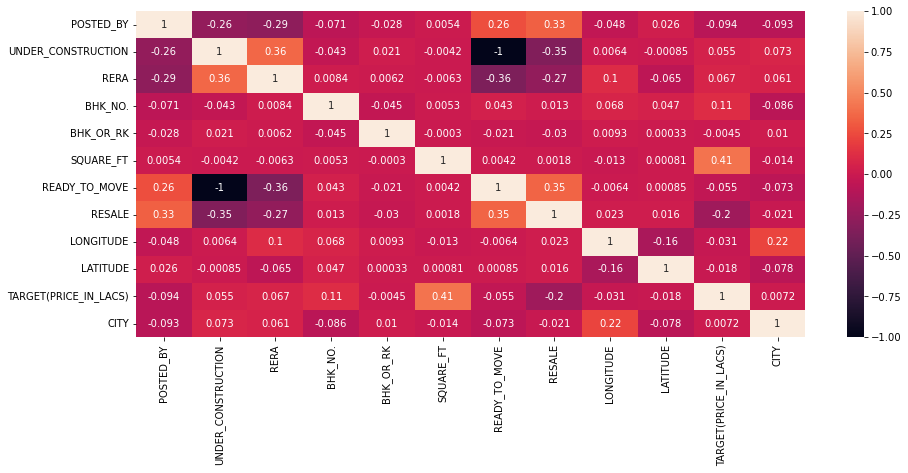

In [22]:
plt.figure(figsize=(15,6))
sns.heatmap(cor,annot=True,fmt="1.2g")

### Result:-
* correlation present in our training dataset.

### Data splitting 

In [23]:
# split our data into independent & dependent form.
x_data=Train_data.iloc[:,[0,1,2,3,4,5,6,7,8,9,11]]
y_data=Train_data.iloc[:,[10]]

### Standardization method of Feature Scaling of independent data

In [24]:
sc=StandardScaler()
x_train_data=sc.fit_transform(x_data)

### Feature scaling for dependent data

D:\Shital\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TARGET(PRICE_IN_LACS)', ylabel='Density'>

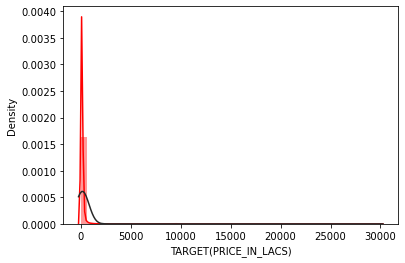

In [25]:
# Lets check the distribution of the target column
sns.distplot(Train_data["TARGET(PRICE_IN_LACS)"],fit=norm,color="red")

### Result:-
* Our target data is not a normal so we need to convert it into normal.

In [26]:
### Method 1 :- Log Transformation

y_train_data=np.log(Train_data["TARGET(PRICE_IN_LACS)"])


D:\Shital\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TARGET(PRICE_IN_LACS)', ylabel='Density'>

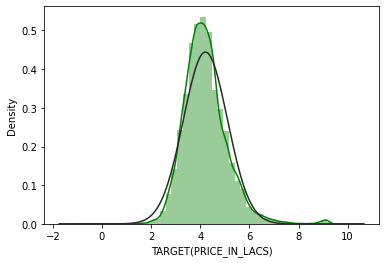

In [27]:
# Lets check the distribution of the target column
sns.distplot(y_train_data,fit=norm,color="green")

D:\Shital\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Shital\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'After Transformation'}, xlabel='TARGET(PRICE_IN_LACS)', ylabel='Density'>

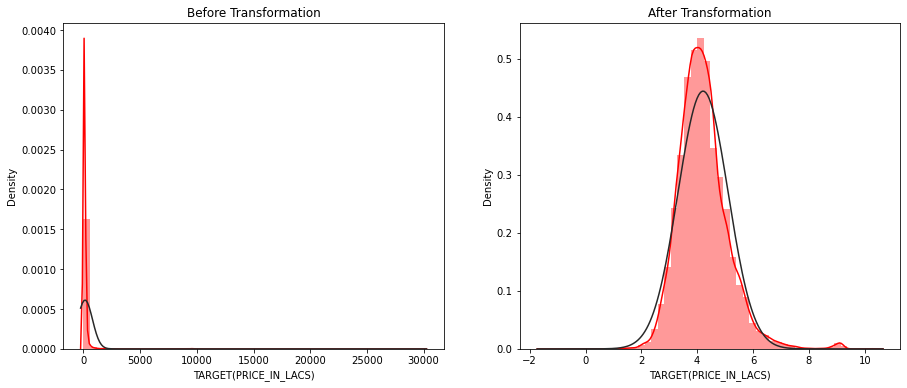

In [28]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.subplots_adjust(hspace=1.5,wspace=0.2)
plt.title("Before Transformation")
sns.distplot(Train_data["TARGET(PRICE_IN_LACS)"],fit=norm,color="red")
plt.subplot(1,2,2)
plt.subplots_adjust(hspace=1.5,wspace=0.2)
plt.title("After Transformation")
sns.distplot(y_train_data,fit=norm,color="red")


### Result:-
* Our dependent data is also converted in normal.


### Result :-
* Training data is ready for the model fitting.


### Testing Dataset


In [29]:
test_data=pd.read_csv(r"D:\Datasets\house_price_test.csv")
test_data.head()

test_data.shape

(68720, 11)

### Null Value Handling

In [30]:
test_data.isnull().any()

POSTED_BY             False
UNDER_CONSTRUCTION    False
RERA                  False
BHK_NO.               False
BHK_OR_RK             False
SQUARE_FT             False
READY_TO_MOVE         False
RESALE                False
ADDRESS               False
LONGITUDE             False
LATITUDE              False
dtype: bool

In [31]:
test_data.isnull().sum()

POSTED_BY             0
UNDER_CONSTRUCTION    0
RERA                  0
BHK_NO.               0
BHK_OR_RK             0
SQUARE_FT             0
READY_TO_MOVE         0
RESALE                0
ADDRESS               0
LONGITUDE             0
LATITUDE              0
dtype: int64

### Result:-
* There is no null values present in our testing data.

In [32]:
### Duplicate Value
test_data.duplicated().sum()

2470

### Result:-
* Duplicate data present in our testing data.

### Remove duplicate data

In [33]:
Test_data=test_data.drop_duplicates()

Test_data

Test_data.shape


(66250, 11)

### Result:-
* Duplicate data is successfully removed from the testing data.


In [34]:
# Find unique city name from the adress column and store it in new variable.
Test_data["CITY"]=Test_data["ADDRESS"].str.split(",").str.get(1)

C:\Users\shita\AppData\Local\Temp\ipykernel_7596\2479264889.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test_data["CITY"]=Test_data["ADDRESS"].str.split(",").str.get(1)


Text(0.5, 1.0, 'Pie chart')

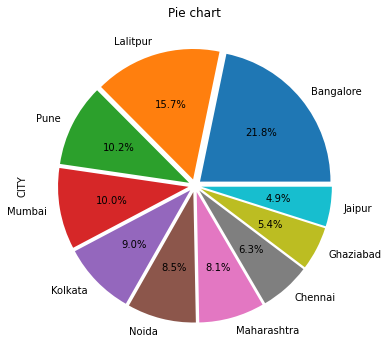

In [35]:
plt.figure(figsize=(15,6))
Test_data["CITY"].value_counts().head(10).plot(kind="pie",autopct="%1.1f%%",explode=[0.05]*10)
plt.title("Pie chart")

In [36]:
del Test_data["ADDRESS"]

In [37]:
# Convert string data into numerical form.
le=LabelEncoder()
col=["POSTED_BY","BHK_OR_RK","CITY"]
for i in col:
    Test_data[i]=le.fit_transform(Test_data[i])

Test_data

C:\Users\shita\AppData\Local\Temp\ipykernel_7596\2164943812.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test_data[i]=le.fit_transform(Test_data[i])


,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,CITY
0,2,0,0,1,0,545.171340,1,1,21.262000,73.047700,667
1,1,1,1,2,0,800.000000,0,0,18.966114,73.148278,535
2,1,0,0,2,0,1257.096513,1,1,22.592200,88.484911,524
3,1,0,0,3,0,1400.329489,1,1,26.988300,75.584600,483
4,2,0,0,1,0,430.477830,1,1,22.700000,72.870000,567
...,...,...,...,...,...,...,...,...,...,...,...
68715,1,0,1,2,0,856.555505,1,1,19.180000,72.963330,544
68716,1,0,1,3,0,2304.147465,1,1,30.661104,76.746082,557
68717,1,1,1,1,0,33362.792750,0,0,19.222101,72.988231,544
68718,1,0,0,2,0,1173.708920,1,1,18.496670,73.941670,612


In [38]:
sc=StandardScaler()
x_test_data=sc.fit_transform(Test_data)

### Result:-
* Our testing data is ready for model fitting.

## Model Selection

### This is a Regression problem . so we use linear regression for the prediction.
### Linear Regression

In [39]:
lr=LinearRegression()
lr.fit(x_train_data,y_train_data)

y_pred=lr.predict(x_test_data)

In [40]:
### This prediction is calculated using log. So for the actual value we need to take an antilog of the predicted value.

Y_pred=np.exp(y_pred)


In [41]:
### Now store this Predicted value of testing data in new variable.

Test_data["Predicted Price (In LACS)"]=Y_pred

Test_data

C:\Users\shita\AppData\Local\Temp\ipykernel_7596\3210802102.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test_data["Predicted Price (In LACS)"]=Y_pred


,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,CITY,Predicted Price (In LACS)
0,2,0,0,1,0,545.171340,1,1,21.262000,73.047700,667,27.590537
1,1,1,1,2,0,800.000000,0,0,18.966114,73.148278,535,74.726971
2,1,0,0,2,0,1257.096513,1,1,22.592200,88.484911,524,54.886995
3,1,0,0,3,0,1400.329489,1,1,26.988300,75.584600,483,86.132283
4,2,0,0,1,0,430.477830,1,1,22.700000,72.870000,567,24.668765
...,...,...,...,...,...,...,...,...,...,...,...,...
68715,1,0,1,2,0,856.555505,1,1,19.180000,72.963330,544,84.880454
68716,1,0,1,3,0,2304.147465,1,1,30.661104,76.746082,557,95.568139
68717,1,1,1,1,0,33362.792750,0,0,19.222101,72.988231,544,45.775137
68718,1,0,0,2,0,1173.708920,1,1,18.496670,73.941670,612,75.414467
